In [1]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 4.8 MB/s 
     |████████████████████████████████| 18.0 MB 99 kB/s 
     |████████████████████████████████| 238 kB 57.6 MB/s 
     |████████████████████████████████| 200 kB 56.8 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 1.6 MB 28.0 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 37.5 MB 15 kB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 943 kB 53.5 MB/s 
     |████████████████████████████████| 3.6 MB 42.0 MB/s 
     |████████████████████████████████| 113 kB 64.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=17ef2b0a7b217675e950c98e2294af2cd7aff31a60a6965a7773ba3ef72f8390
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c944

In [23]:
#importing Qiskit
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble
from qiskit import Aer

#Importing Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt

#Importing Qiskit Visualizer
from qiskit.visualization import plot_histogram

In [37]:
#initial Arguments

s = '11101101' #Secret String
n = len(s) #No. of Qubits

In [38]:
#The Bernstein Vazirani Algorithm

#'n+1' qubits ('n' qubits (input) and 1 ancilla) and 'n' classical registers (for output)
qcirc_bv = QuantumCircuit(n+1, n) #Circuit with n+1 qubits and n classical registers 

#Making the ancilla to |-> state
qcirc_bv.h(n)
qcirc_bv.z(n)

#Applying Hadamards to all other qubits
for i in range(n):
  qcirc_bv.h(i)

#Applying a barrier
qcirc_bv.barrier()

#Applying the Oracle
s = s[::-1]  #Reversing the order to fit Qiskit's ordering
for q in range(n):
  if s[q] == '0':
    qcirc_bv.i(q)
  else:
    qcirc_bv.cx(q, n)

#Applying a barrier
qcirc_bv.barrier()

#Applying Hadamards again
for i in range(n):
  qcirc_bv.h(i)

#Measuring the output
for i in range(n):
  qcirc_bv.measure(i, i)

#Drawing the Circuit
qcirc_bv.draw()

┌───┐      ░                                     ░ ┌───┐┌─┐               »
q_0: ┤ H ├──────░───■─────────────────────────────────░─┤ H ├┤M├───────────────»
     ├───┤      ░   │  ┌───┐                          ░ ├───┤└╥┘┌─┐            »
q_1: ┤ H ├──────░───┼──┤ I ├──────────────────────────░─┤ H ├─╫─┤M├────────────»
     ├───┤      ░   │  └───┘                          ░ ├───┤ ║ └╥┘┌─┐         »
q_2: ┤ H ├──────░───┼─────────■───────────────────────░─┤ H ├─╫──╫─┤M├─────────»
     ├───┤      ░   │         │                       ░ ├───┤ ║  ║ └╥┘┌─┐      »
q_3: ┤ H ├──────░───┼─────────┼────■──────────────────░─┤ H ├─╫──╫──╫─┤M├──────»
     ├───┤      ░   │  ┌───┐  │    │                  ░ ├───┤ ║  ║  ║ └╥┘┌─┐   »
q_4: ┤ H ├──────░───┼──┤ I ├──┼────┼──────────────────░─┤ H ├─╫──╫──╫──╫─┤M├───»
     ├───┤      ░   │  └───┘  │    │                  ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐»
q_5: ┤ H ├──────░───┼─────────┼────┼────■─────────────░─┤ H ├─╫──╫──╫──╫──╫─┤M├»
     ├───┤      ░   │         │    │    │             ░ ├───┤ ║  ║  ║  ║  ║ └╥┘»
q_6: ┤ H ├──────░───┼─────────┼────┼────┼────■────────░─┤ H ├─╫──╫──╫──╫──╫──╫─»
     ├───┤      ░   │         │    │    │    │        ░ ├───┤ ║  ║  ║  ║  ║  ║ »
q_7: ┤ H ├──────░───┼─────────┼────┼────┼────┼────■───░─┤ H ├─╫──╫──╫──╫──╫──╫─»
     ├───┤┌───┐ ░ ┌─┴─┐     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║  ║  ║ »
q_8: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫──╫─»
     └───┘└───┘ ░ └───┘     └───┘└───┘└───┘└───┘└───┘ ░       ║  ║  ║  ║  ║  ║ »
c: 8/═════════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩═»
                                                              0  1  2  3  4  5 »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«           
«q_4: ──────
«           
«q_5: ──────
«     ┌─┐   
«q_6: ┤M├───
«     └╥┘┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«q_8: ─╫──╫─
«      ║  ║ 
«c: 8/═╩══╩═
«      6  7

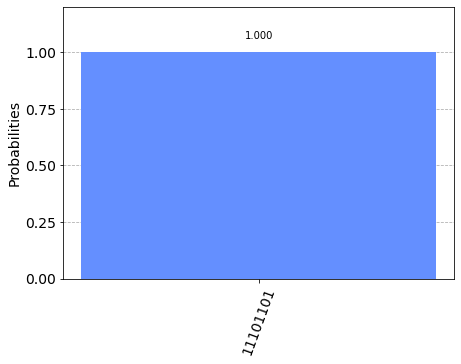

In [39]:
#simulating on Local Simulator

aer_simulator = Aer.get_backend('aer_simulator')
shots = 1024
qcirc = assemble(qcirc_bv)
results = aer_simulator.run(qcirc).result()
values = results.get_counts()

plot_histogram(values)